In [ ]:
from features_extractor import Extractor
from preprocess import PreProcessor
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm


# Read data

In [ ]:
#Read data
data_csv = pd.read_csv('./dataset/all_2years.csv')
data_df = pd.DataFrame(data_csv)
data_df.drop(columns=['MARKETCAP', 'VN30_PRICE', 'VN30_VOL', 'VN30_VAL','Unnamed: 0'], inplace= True) #remove unused features

tickers = data_df['TICKER'].unique() #collect name of tickers
print(tickers)
print('Dữ liệu bao gồm: ',len(tickers), ' mã chứng khoán')
print(data_df['TICKER'].size,' dòng dữ liệu')

data_df.head()

['ABC' 'ACC' 'ABT' ... 'PBT' 'TVH' 'GLC']
Dữ liệu bao gồm:  1083  mã chứng khoán
290208  dòng dữ liệu


,TICKER,TXDATE,open,high,close,low,volume
0,ABC,2020-02-28,8.5132,8.5132,9.34200,8.3321,5700
1,ACC,2020-02-28,12.9782,12.9782,19.50000,12.9782,20
2,ABT,2020-02-28,30.1352,30.1352,31.05920,30.0882,260
3,ACB,2020-02-28,17.6992,19.4691,19.38384,17.6992,5959642
4,ACL,2020-02-28,9.0000,9.0454,9.04455,8.6364,16050


In [ ]:
data_df.dtypes

TICKER     object
TXDATE     object
open      float64
high      float64
close     float64
low       float64
volume      int64
dtype: object

# EDA

{1: 52, 12: 1, 28: 1, 32: 1, 35: 1, 38: 1, 39: 1, 41: 1, 45: 1, 52: 1, 54: 1, 63: 1, 69: 1, 77: 1, 78: 1, 96: 1, 105: 1, 133: 1, 147: 1, 156: 1, 160: 1, 161: 1, 165: 1, 169: 1, 176: 1, 182: 1, 185: 1, 190: 1, 201: 1, 219: 1, 240: 1, 241: 1, 253: 1, 257: 1, 261: 1, 270: 2, 271: 1, 277: 1, 278: 1, 279: 5, 280: 4, 281: 3, 282: 2, 283: 3, 285: 23, 286: 120, 287: 832}


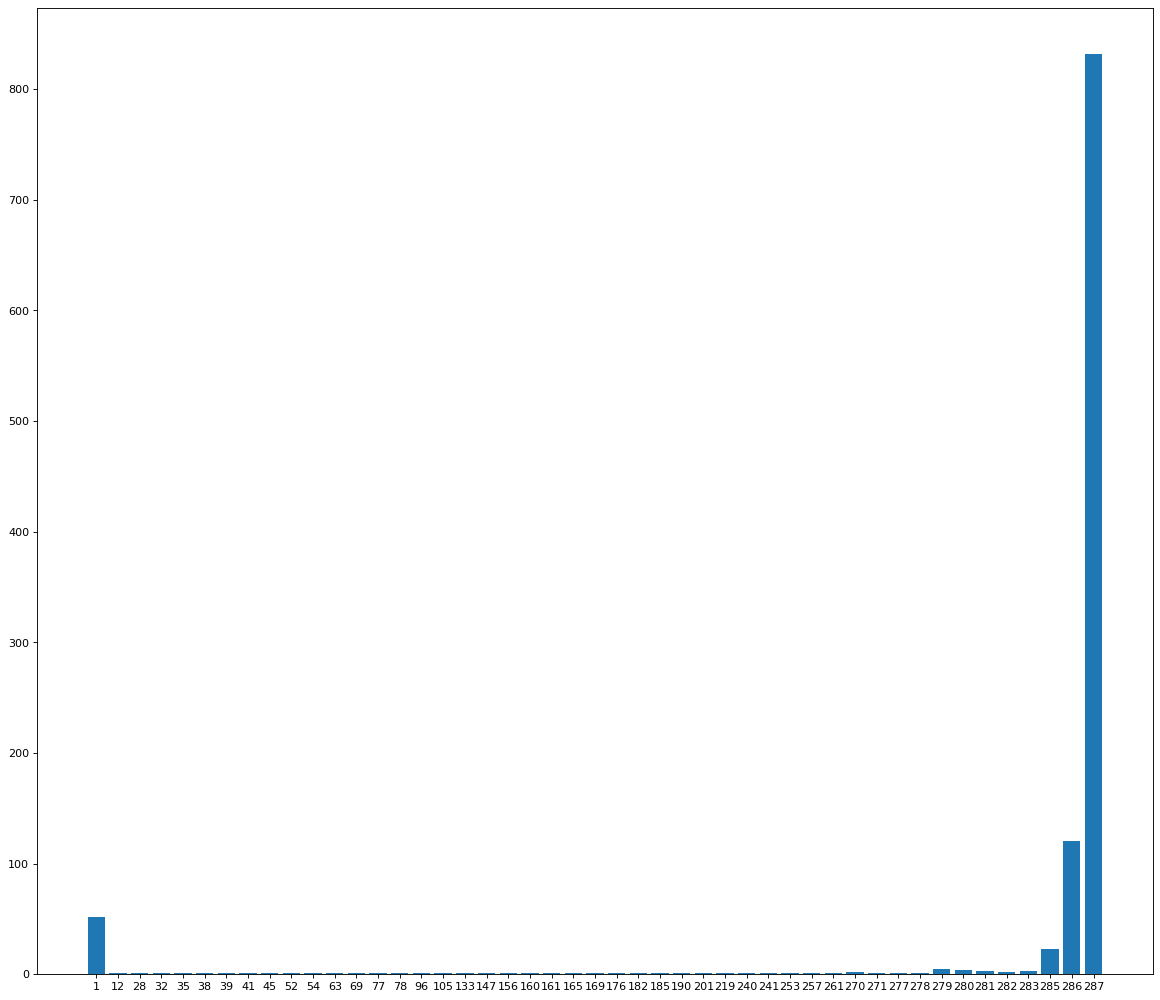

In [ ]:
#plot number of trading days
numtrading_dic = dict(data_df['TICKER'].value_counts().groupby(by=data_df['TICKER'].value_counts()).count())
print(numtrading_dic)
names = list(numtrading_dic.keys())
values = list(numtrading_dic.values())

plt.figure(figsize=(18, 16), dpi=80)
plt.bar(range(len(numtrading_dic)), values, tick_label=names)
plt.show()

In [ ]:
#Because just a few tickers have a number of trading days lower than 260 days so we drop them out
tickers = [k for (k,v) in dict(data_df['TICKER'].value_counts()).items() if v > 260]
print(len(tickers))

998


In [ ]:
FLC_infor = data_df.loc[data_df['TICKER']=='FLC']
FLC_infor

,TICKER,TXDATE,open,high,close,low,volume
200,FLC,2020-02-28,3.82,3.83,3.76,3.74,7780890
1236,FLC,2020-02-27,3.75,3.85,3.85,3.75,3799380
2387,FLC,2020-02-26,3.75,3.82,3.76,3.74,3789960
3294,FLC,2020-02-25,3.55,3.83,3.83,3.55,7204230
5033,FLC,2020-02-24,3.91,3.93,3.73,3.73,19077270
...,...,...,...,...,...,...,...
285508,FLC,2019-01-08,5.13,5.35,5.34,5.09,6679160
286498,FLC,2019-01-07,5.13,5.19,5.13,5.13,2496730
287482,FLC,2019-01-04,4.95,5.08,5.05,4.93,3400350
288481,FLC,2019-01-03,5.11,5.14,5.05,4.90,6074050


C:\Users\ThinkPro\AppData\Local\Temp\ipykernel_11396\4208498755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FLC_infor["TXDATE"]=pd.to_datetime(FLC_infor.TXDATE,format="%Y-%m-%d")


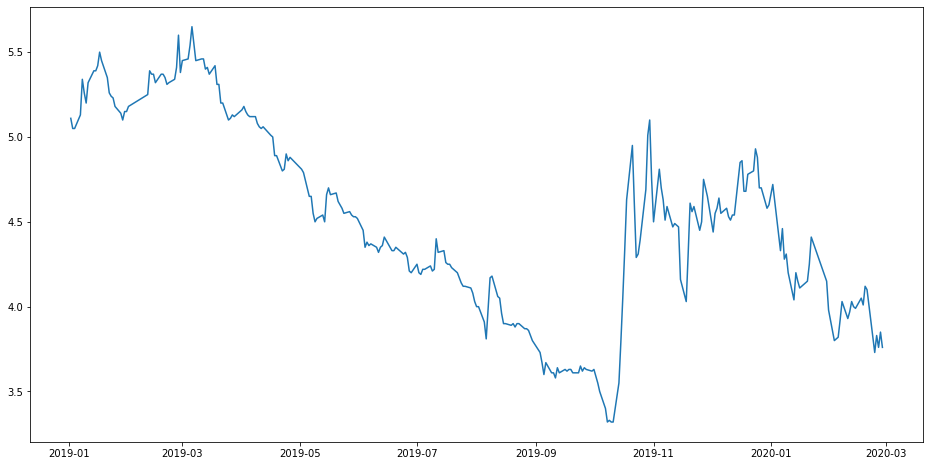

In [ ]:
FLC_infor["TXDATE"]=pd.to_datetime(FLC_infor.TXDATE,format="%Y-%m-%d")
FLC_infor.index=FLC_infor['TXDATE']

plt.figure(figsize=(16,8))
plt.plot(FLC_infor["close"],label='Close Price history')

# Extract and preprocess data

In [ ]:
preprocessor = PreProcessor()
max_len = 150
max_closes = {}
min_closes = {}
success = 0
data_all_tickers = []

for p_ticker in tqdm(tickers, desc= "PreProcessing Data: ", total= len(tickers)):      
	#extractor
	ticker_infor = data_df.loc[data_df['TICKER']==p_ticker]
	extractor = Extractor(ticker_infor, p_ticker, max_len)
	ticker_infor = extractor.process()
	# print(ticker_infor)

	# preprocess
	ticker_infor, max_close, min_close = preprocessor.preprocess(ticker_infor)

	ticker_infor['name'] = [p_ticker for i in range(len(ticker_infor.index))]
	
	if success == 0:
		data_all_tickers = pd.DataFrame(ticker_infor)
	else:
		data_all_tickers = pd.concat([data_all_tickers, ticker_infor], axis = 0)
	max_closes[p_ticker] = max_close
	min_closes[p_ticker] = min_close

	success = success+1

print('Done Preprocessing')

PreProcessing Data: 100%|██████████| 998/998 [01:15<00:00, 13.22it/s]

Done Preprocessing


# Split train, test data

In [ ]:
#Split
import numpy as np
tickers_final = data_all_tickers['name'].unique()
train_data = tickers_final[:800]
valid_data = tickers_final[800:]
x_train_data,y_train_data=[],[]
# print(data_all_tickers.columns)
for ticker in tqdm(train_data) :
    ticker_infor = data_all_tickers.loc[data_all_tickers['name']==p_ticker]
    # for i in range(60, 150):
    #     x = ticker_infor.iloc[i-60:i].drop(columns=['TXDATE','name']).to_numpy()
    #     x_train_data.append(x)

    #     y = ticker_infor.iloc[i]['close']
    #     y_train_data.append(y)
    x = ticker_infor.iloc[:-1].drop(columns=['TXDATE','name']).to_numpy()
    x_train_data.append(x)

    y = ticker_infor.iloc[-1]['close']
    y_train_data.append(y)

x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
    

100%|██████████| 800/800 [00:09<00:00, 85.99it/s]


In [ ]:
print(x_train_data.shape)
print(y_train_data.shape)

(800, 149, 24)
(800,)


# Build model

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
#Build Model
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],24)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))


In [68]:
#train
epochs = 1
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
for i in range(epochs):
    lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

800/800 - 38s - loss: 0.0000e+00 - 38s/epoch - 47ms/step


In [70]:
#test
x_test_data = []
y_test_data = []

for ticker in tqdm(valid_data) :
    ticker_infor = data_all_tickers.loc[data_all_tickers['name']==p_ticker]
    # for i in range(60, 150):
    #     x = ticker_infor.iloc[i-60:i].drop(columns=['TXDATE','name']).to_numpy()
    #     x_train_data.append(x)

    #     y = ticker_infor.iloc[i]['close']
    #     y_train_data.append(y)
    x_test_data = ticker_infor.iloc[:-1].drop(columns=['TXDATE','name']).to_numpy()
    # x_test_data.append(x)

    y_test_data = ticker_infor.iloc[-1]['close']
    # y_test_data.append(y)
    break
predicted_closing_price=lstm_model.predict(x_test_data)

  0%|          | 0/198 [00:00<?, ?it/s]


ValueError: in user code:

    File "c:\Users\ThinkPro\OneDrive\Máy tính\Hamy\stockenv\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\ThinkPro\OneDrive\Máy tính\Hamy\stockenv\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ThinkPro\OneDrive\Máy tính\Hamy\stockenv\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\ThinkPro\OneDrive\Máy tính\Hamy\stockenv\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "c:\Users\ThinkPro\OneDrive\Máy tính\Hamy\stockenv\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\ThinkPro\OneDrive\Máy tính\Hamy\stockenv\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 149, 24), found shape=(None, 24)


In [ ]:
lstm_model.save("saved_model.h5")

In [11]:
#evaluate
import sklearn
MSE = sklearn.metrics.mean_squared_error(y_test_data, predicted_closing_price)
print(MSE)